In [1]:
from IPython.display import display, Math, Latex

import pandas as pd
import numpy as np
import numpy_financial as npf
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

## Group Assignment
### Team Number: 16
### Team Member Names: Stephen Chen, Bhavya Shah, Alex Liu
### Team Strategy Chosen: RISKY?__________(RISKY OR SAFE)

In [2]:
# Importing csv file with tickers and reformatting dataframe
ticker_list = pd.read_csv("Tickers.csv")
add_columns = pd.DataFrame({ticker_list.columns[0]:ticker_list.columns[0]}, index=[len(ticker_list)])
ticker_list = ticker_list.append(add_columns)
ticker_list.columns=['Tickers']

In [3]:
ticker_list

,Tickers
0,ABBV
1,ABT
2,ACN
3,AGN
4,AIG
...,...
57,UNH
58,UNP
59,UPS
60,USB


In [4]:
# identifying American stocks, converting tickers to American (if possible)
for i in range(0, len(ticker_list)):
    ticker = str(ticker_list.iloc[i, 0])
    
    # finds the period in the stock tickers
    get_position = ticker.find('.')
    
    # if there is a period in the string (meaning that it's not an American stock)
    if (get_position != -1):
        ticker_list.iloc[i, 0] = ticker[:get_position]

In [5]:
sector_list = pd.DataFrame(columns = ['Sectors'])

def get_deviation(ticker):
    stock_ticker = ticker
    stock_hist = stock_ticker.history(start='2019-01-01', end='2021-07-01')
    stock_close = stock_hist['Close']
    stock_close.index = pd.to_datetime(stock_close.index)
    
    monthly_close = stock_close.groupby(stock_close.index.to_period('m')).head(1)

    return (monthly_close.pct_change()*100).std()

i = 0

for i in range (len(ticker_list)):
    stock = yf.Ticker(ticker_list.iloc[i, 0])
    sector = stock.info.get('sector')
    add_data = pd.DataFrame({'Sectors':sector,
                             'Standard Deviation': get_deviation(stock)},index=[i])
    sector_list = sector_list.append(add_data)



- AGN: No data found, symbol may be delisted
- CELG: No data found, symbol may be delisted
- PCLN: None
- RTN: No data found, symbol may be delisted
- TWX: No data found for this date range, symbol may be delisted


In [6]:
sector_list

,Sectors,Standard Deviation
0,Healthcare,7.988455
1,Healthcare,6.116647
2,Technology,7.287930
3,None,NaN
4,Financial Services,13.725121
...,...,...
57,Healthcare,7.511741
58,Industrials,7.487051
59,Industrials,9.123710
60,Financial Services,9.560576


In [7]:
ticker_list = pd.concat([ticker_list, sector_list], join='inner',axis=1)

In [8]:
ticker_list = ticker_list[ticker_list.Sectors.notnull()]
ticker_list.set_index('Sectors', inplace=True)

In [9]:
ticker_list

,Tickers,Standard Deviation
Sectors,,
Healthcare,ABBV,7.988455
Healthcare,ABT,6.116647
Technology,ACN,7.287930
Financial Services,AIG,13.725121
Consumer Cyclical,AMZN,7.556318
Financial Services,AXP,10.202618
Industrials,BA,16.241780
Financial Services,BAC,10.704365
Healthcare,BIIB,10.938942


In [10]:
# placeholder volume column
ticker_list["Volume"] = None

# loop to calculate the average daily volume of each stock
for i in range (0, len(ticker_list)):
    
    # getting the number of days between June 2, 2021 and October 22, 2021
    num_days = int(str(pd.to_datetime('2021-07-02') - pd.to_datetime('2021-10-22'))[1:4])
    
    # getting each ticker's information
    ticker = yf.Ticker(ticker_list.iloc[i, 0])
    ticker_hist = ticker.history(start="2021-07-02", end="2021-10-22")
    ticker_volume = ticker_hist['Volume'].sum()/num_days
    ticker_list.iloc[i, -1] = ticker_volume
    
# filtering for the tickers that fit our requirement
ticker_list = ticker_list[(ticker_list["Volume"] > 10000)]

In [11]:
def sort_list (industry_list, industry):
    industry_list = ticker_list.filter(like = industry, axis=0)
    industry_list = industry_list.sort_values(by=['Standard Deviation'], ascending = False)
    return industry_list
    

In [12]:
energy_list = sort_list (ticker_list, 'Energy')
energy_list

,Tickers,Standard Deviation,Volume
Sectors,,,
Energy,OXY,22.815746,11707057.142857
Energy,SLB,17.542832,7528641.964286
Energy,COP,14.466938,6067660.714286
Energy,KMI,10.325056,9776673.214286


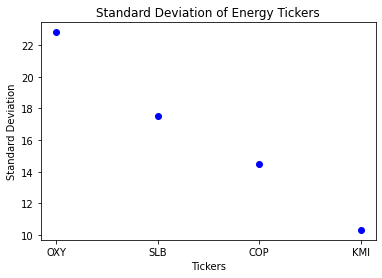

In [51]:
plt.scatter(energy_list.Tickers, energy_list["Standard Deviation"], color='b')


# Set axis and title
plt.title('Standard Deviation of Energy Tickers')
plt.xlabel('Tickers')
plt.ylabel('Standard Deviation')
plt.show()

In [19]:
financial_list = sort_list (ticker_list, 'Financial Services') 
financial_list

,Tickers,Standard Deviation,Volume
Sectors,,,
Financial Services,COF,14.307942,1965058.035714
Financial Services,AIG,13.725121,2983665.178571
Financial Services,C,13.463323,12883508.928571
Financial Services,MS,11.786987,5997000.892857
Financial Services,BAC,10.704365,33489260.714286
Financial Services,PYPL,10.427346,4678679.464286
Financial Services,AXP,10.202618,2532703.571429
Financial Services,USB,9.560576,3711789.285714
Financial Services,JPM,9.198505,7968159.821429


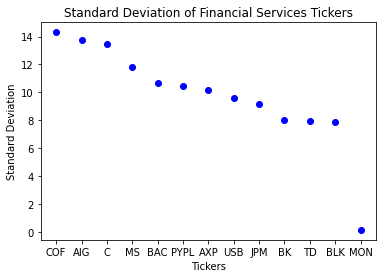

In [52]:
plt.scatter(financial_list.Tickers, financial_list["Standard Deviation"], color='b')


# Set axis and title
plt.title('Standard Deviation of Financial Services Tickers')
plt.xlabel('Tickers')
plt.ylabel('Standard Deviation')
plt.show()

In [29]:
tech_list = sort_list (ticker_list, 'Technology')
tech_list

,Tickers,Standard Deviation,Volume
Sectors,,,
Technology,SHOP,16.161670,691973.214286
Technology,QCOM,14.112572,4954920.535714
Technology,AAPL,10.793171,55696846.428571
Technology,CSCO,8.377776,10937365.178571
Technology,TXN,7.321356,2425787.5
Technology,ACN,7.287930,1248614.285714
Technology,MSFT,6.181565,15980571.428571
Technology,ORCL,5.688578,7671951.785714


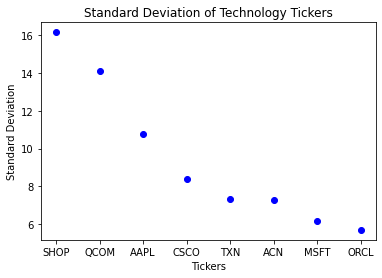

In [53]:
plt.scatter(tech_list.Tickers, tech_list["Standard Deviation"], color='b')


# Set axis and title
plt.title('Standard Deviation of Technology Tickers')
plt.xlabel('Tickers')
plt.ylabel('Standard Deviation')
plt.show()

In [31]:
healthcare_list = sort_list (ticker_list, 'Healthcare')
healthcare_list

,Tickers,Standard Deviation,Volume
Sectors,,,
Healthcare,BIIB,10.938942,752603.571429
Healthcare,ABBV,7.988455,4826476.785714
Healthcare,LLY,7.642478,1768306.25
Healthcare,UNH,7.511741,1778942.857143
Healthcare,PFE,7.478984,21327650.892857
Healthcare,CVS,6.992257,3637359.821429
Healthcare,ABT,6.116647,3254866.964286
Healthcare,BMY,5.335536,6440792.857143
Healthcare,MRK,4.701917,8697586.607143


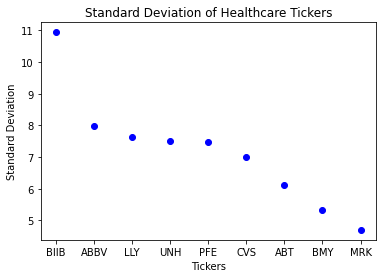

In [54]:
plt.scatter(healthcare_list.Tickers, healthcare_list["Standard Deviation"], color='b')


# Set axis and title
plt.title('Standard Deviation of Healthcare Tickers')
plt.xlabel('Tickers')
plt.ylabel('Standard Deviation')
plt.show()

In [35]:
estate_list = sort_list (ticker_list, 'Real Estate')
estate_list

,Tickers,Standard Deviation,Volume
Sectors,,,
Real Estate,SPG,16.14286,1387918.75


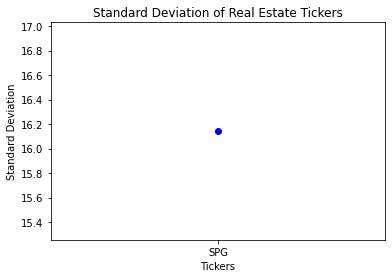

In [55]:
plt.scatter(estate_list.Tickers, estate_list["Standard Deviation"], color='b')


# Set axis and title
plt.title('Standard Deviation of Real Estate Tickers')
plt.xlabel('Tickers')
plt.ylabel('Standard Deviation')
plt.show()

In [38]:
industry_list = sort_list (ticker_list, 'Industrials')
industry_list

,Tickers,Standard Deviation,Volume
Sectors,,,
Industrials,BA,16.241780,6776169.642857
Industrials,UPS,9.123710,1871184.821429
Industrials,CAT,8.220692,2384585.714286
Industrials,UNP,7.487051,2148769.642857
Industrials,LMT,6.205284,787491.964286


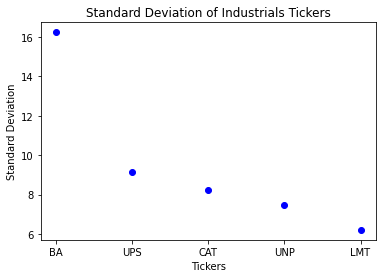

In [56]:
plt.scatter(industry_list.Tickers, industry_list["Standard Deviation"], color='b')


# Set axis and title
plt.title('Standard Deviation of Industrials Tickers')
plt.xlabel('Tickers')
plt.ylabel('Standard Deviation')
plt.show()

In [42]:
utilities_list = sort_list(ticker_list, 'Utilities')
utilities_list

,Tickers,Standard Deviation,Volume
Sectors,,,
Utilities,SO,6.737806,2736672.321429
Utilities,NEE,6.301429,4644516.964286


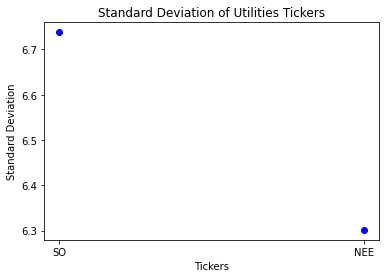

In [57]:
plt.scatter(utilities_list.Tickers, utilities_list["Standard Deviation"], color='b')


# Set axis and title
plt.title('Standard Deviation of Utilities Tickers')
plt.xlabel('Tickers')
plt.ylabel('Standard Deviation')
plt.show()

In [44]:
communication_list = sort_list(ticker_list,'Communication Services')
communication_list

,Tickers,Standard Deviation,Volume
Sectors,,,
Communication Services,GOOG,8.292007,723633.035714
Communication Services,CMCSA,7.988794,10583018.75
Communication Services,T,6.314876,24657718.75


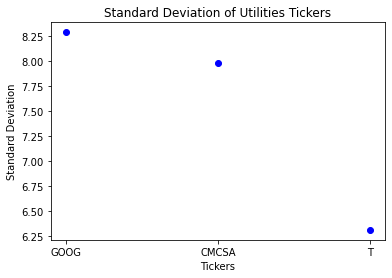

In [58]:
plt.scatter(communication_list.Tickers, communication_list["Standard Deviation"], color='b')


# Set axis and title
plt.title('Standard Deviation of Utilities Tickers')
plt.xlabel('Tickers')
plt.ylabel('Standard Deviation')
plt.show()

In [46]:
materials_list = sort_list(ticker_list,'Basic Materials')
materials_list

,Tickers,Standard Deviation,Volume
Sectors,,,


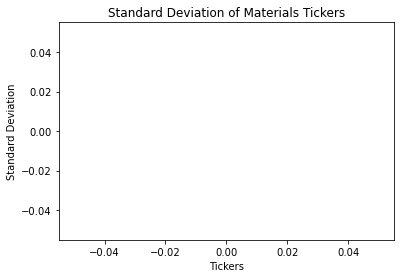

In [59]:
plt.scatter(materials_list.Tickers, materials_list["Standard Deviation"], color='b')


# Set axis and title
plt.title('Standard Deviation of Materials Tickers')
plt.xlabel('Tickers')
plt.ylabel('Standard Deviation')
plt.show()

In [49]:
consumer_list = sort_list(ticker_list,'Consumer Defensive')
consumer_list

,Tickers,Standard Deviation,Volume
Sectors,,,
Consumer Defensive,TGT,8.985541,2036626.785714
Consumer Defensive,MO,7.211177,4468792.857143
Consumer Defensive,PM,6.948020,2618207.142857
Consumer Defensive,KO,6.287179,9514454.464286
Consumer Defensive,PEP,4.903556,2789961.607143
Consumer Defensive,COST,4.893259,1203228.571429
Consumer Defensive,CL,4.821828,2655066.071429
Consumer Defensive,PG,4.337722,4636135.714286


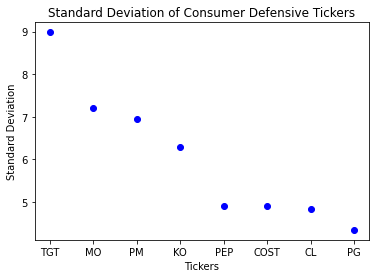

In [60]:
plt.scatter(consumer_list.Tickers, consumer_list["Standard Deviation"], color='b')


# Set axis and title
plt.title('Standard Deviation of Consumer Defensive Tickers')
plt.xlabel('Tickers')
plt.ylabel('Standard Deviation')
plt.show()

In [22]:
ticker_list = pd.concat([energy_list, financial_list, tech_list, healthcare_list, estate_list,industry_list, utilities_list,communication_list,
                         materials_list, consumer_list])

In [23]:
ticker_list = ticker_list[:10]
ticker_list

,Tickers,Standard Deviation,Volume
Sectors,,,
Energy,OXY,22.815746,11707057.142857
Energy,SLB,17.542832,7528641.964286
Energy,COP,14.466938,6067660.714286
Energy,KMI,10.325056,9776673.214286
Financial Services,COF,14.307942,1965058.035714
Financial Services,AIG,13.725122,2983665.178571
Financial Services,C,13.463323,12883508.928571
Financial Services,MS,11.786987,5997000.892857
Financial Services,BAC,10.704365,33489260.714286


In [61]:
data=[['Energy', 31.249291154889463], ['Financial Services', 9.21826286422723], ['Technology', 12.211226710255689], ['Healthcare', 17.453798073220856], ['Real Estate', 8.795527264061368], ['Industrials', 8.813592287304981], ['Utilities', 6.035320435531984], ['Communication Services', 7.957377273938338], ['Basic Materials', 9.641332651257981], ['Consumer Defensive', 6.9597788350507654]]
slat= pd.DataFrame(data)
slat.head

<bound method NDFrame.head of                         0          1
0                  Energy  31.249291
1      Financial Services   9.218263
2              Technology  12.211227
3              Healthcare  17.453798
4             Real Estate   8.795527
5             Industrials   8.813592
6               Utilities   6.035320
7  Communication Services   7.957377
8         Basic Materials   9.641333
9      Consumer Defensive   6.959779>

In [68]:
data= {'Energy': [31.249291154889463],
           'Financial Services': [9.21826286422723],
           'Technology':[12.211226710255689],
           'Healthcare': [17.453798073220856], 'Real Estate': [8.795527264061368], 'Industrials': [8.813592287304981],
      'Utilities': [6.035320435531984], 'Communication Services': [7.957377273938338],
       'Basic Materials': [9.641332651257981]
      ,'Consumer Defensive': [6.9597788350507654]}
proper= pd.DataFrame(data)
proper.head()

,Energy,Financial Services,Technology,Healthcare,Real Estate,Industrials,Utilities,Communication Services,Basic Materials,Consumer Defensive
0,31.249291,9.218263,12.211227,17.453798,8.795527,8.813592,6.03532,7.957377,9.641333,6.959779


<function matplotlib.pyplot.show(close=None, block=None)>

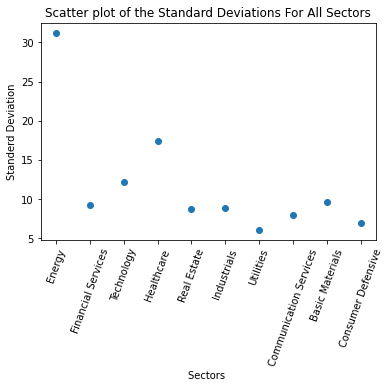

In [72]:
y= [31.249291154889463,9.21826286422723,12.211226710255689,17.453798073220856,8.795527264061368,8.813592287304981,6.035320435531984,7.957377273938338,9.641332651257981,6.9597788350507654]
x=['Energy', 'Financial Services', 'Technology','Healthcare', 'Real Estate', 'Industrials','Utilities', 'Communication Services','Basic Materials','Consumer Defensive']
plt.scatter(x,y)
plt.title('Scatter plot of the Standard Deviations For All Sectors')
plt.xlabel("Sectors ")
plt.ylabel("Standerd Deviation")
plt.xticks(rotation=70)
plt.show

In [ ]:
plt.scatter(proper.Tickers, consumer_list["Standard Deviation"], color='b')


# Set axis and title
plt.title('Standard Deviation of Consumer Defensive Tickers')
plt.xlabel('Tickers')
plt.ylabel('Standard Deviation')
plt.show()

In [24]:
def get_returns (ticker):
    stock = yf.Ticker(ticker)
    start_date = '2019-01-01'
    end_date = '2021-11-01'
    history = stock.history(start=start_date, end=end_date)
    prices = pd.DataFrame({ticker: history['Close']})
    prices = prices.resample('MS').ffill()
    prices = prices.pct_change()
    return prices

get_returns ('OXY')

#return_list = get_returns(ticker_list.iloc[0,0])


,OXY
Date,
2019-01-01,NaN
2019-02-01,NaN
2019-03-01,-0.007202
2019-04-01,0.006464
2019-05-01,-0.144388
2019-06-01,-0.134134
2019-07-01,0.016367
2019-08-01,0.068100
2019-09-01,-0.182246


In [25]:
return_list = get_returns(ticker_list.iloc[0,0])

In [26]:
i = 1
for i in range (len(ticker_list)):
    ticker = ticker_list.iloc[i,0]
    add_returns = get_returns (ticker)
    return_list = pd.concat([return_list, add_returns], join = 'inner', axis = 1)

In [27]:
return_list = return_list.iloc[: , 1:]

In [28]:
return_list

,OXY,SLB,COP,KMI,COF,AIG,C,MS,BAC,PYPL
Date,,,,,,,,,,
2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-01,-0.007202,0.025879,0.008197,0.075749,0.047090,-0.013464,0.012565,0.016260,0.038043,0.097656
2019-04-01,0.006464,-0.009515,-0.017989,0.015198,0.002611,0.025071,-0.001706,0.024235,-0.026271,0.068320
2019-05-01,-0.144388,-0.075737,-0.074162,-0.010224,0.095881,0.065469,0.087011,0.099699,0.060266,0.051066
2019-06-01,-0.134134,-0.161470,-0.054513,0.018377,-0.068347,0.089609,-0.105917,-0.144629,-0.120952,-0.010727
2019-07-01,0.016367,0.149665,0.055801,0.046617,0.071853,0.060648,0.138214,0.080118,0.111991,0.048109
2019-08-01,0.068100,-0.020600,-0.050621,0.006780,-0.008040,0.016159,-0.033786,-0.015591,0.002379,-0.036773
2019-09-01,-0.182246,-0.157881,-0.112585,-0.024073,-0.047085,-0.048803,-0.051444,-0.033543,-0.067141,-0.015794


In [29]:
corr = return_list.corr()
corr

,OXY,SLB,COP,KMI,COF,AIG,C,MS,BAC,PYPL
OXY,1.000000,0.837366,0.864916,0.768749,0.665094,0.613823,0.773747,0.705574,0.723843,0.548201
SLB,0.837366,1.000000,0.919729,0.847097,0.825682,0.769408,0.918622,0.849474,0.905571,0.612465
COP,0.864916,0.919729,1.000000,0.824681,0.775094,0.672034,0.822946,0.727425,0.833510,0.551657
KMI,0.768749,0.847097,0.824681,1.000000,0.814365,0.752446,0.811286,0.702982,0.791618,0.517714
COF,0.665094,0.825682,0.775094,0.814365,1.000000,0.768211,0.839881,0.825563,0.865713,0.615202
AIG,0.613823,0.769408,0.672034,0.752446,0.768211,1.000000,0.781250,0.724992,0.750650,0.535072
C,0.773747,0.918622,0.822946,0.811286,0.839881,0.781250,1.000000,0.924718,0.933449,0.588574
MS,0.705574,0.849474,0.727425,0.702982,0.825563,0.724992,0.924718,1.000000,0.855102,0.725162
BAC,0.723843,0.905571,0.833510,0.791618,0.865713,0.750650,0.933449,0.855102,1.000000,0.538562
PYPL,0.548201,0.612465,0.551657,0.517714,0.615202,0.535072,0.588574,0.725162,0.538562,1.000000


In [30]:
highest_corr = pd.DataFrame({'test':corr[corr.columns[0]].nlargest(2)})
highest_corr

,test
OXY,1.000000
COP,0.864916


In [31]:
def stock_df (ticker, value, num):
    myhistory = (yf.Ticker(ticker).history(start='2021-05-19', end='2021-11-30', interval= '1d'))
    data= {'Ticker': [ticker],
           'Price': [myhistory.loc['2021-06-18', 'Close']],
           'Shares': value/myhistory.loc['2021-06-18', 'Close'],
           'Values': [value], 'Weight (Percent)': [value/1000]}
    grades= pd.DataFrame(data,index=[num])
    return grades

stock1 = stock_df (highest_corr.index[0], 35000, 1)
stock2 = stock_df (highest_corr.index[1], 25000, 2)

In [32]:
ticker_list = ticker_list[ticker_list.Tickers != highest_corr.index[0]]

In [33]:
ticker_list = ticker_list[ticker_list.Tickers != highest_corr.index[1]]

In [34]:
ticker_list

,Tickers,Standard Deviation,Volume
Sectors,,,
Energy,SLB,17.542832,7528641.964286
Energy,KMI,10.325056,9776673.214286
Financial Services,COF,14.307942,1965058.035714
Financial Services,AIG,13.725122,2983665.178571
Financial Services,C,13.463323,12883508.928571
Financial Services,MS,11.786987,5997000.892857
Financial Services,BAC,10.704365,33489260.714286
Financial Services,PYPL,10.427346,4678679.464286


In [35]:
FinalPortfolio = stock1.append(stock2)

i = 0
for i in range (8):
    add_stock = stock_df(ticker_list.iloc[i,0], 5000, i+3)
    FinalPortfolio = FinalPortfolio.append(add_stock)
    
total = pd.DataFrame({'Ticker': 'N/A',
                      'Price': 'N/A',
                      'Shares': 'N/A',
                      'Values': sum(FinalPortfolio.Values),
                      'Weight (Percent)': sum(FinalPortfolio['Weight (Percent)'])}, index=[11])



In [36]:
FinalPortfolio = FinalPortfolio.append(total)

In [37]:
FinalPortfolio

,Ticker,Price,Shares,Values,Weight (Percent)
1,OXY,27.978764,1250.948774,35000,35.0
2,COP,56.752529,440.509002,25000,25.0
3,SLB,31.151695,160.504909,5000,5.0
4,KMI,17.122942,292.005895,5000,5.0
5,COF,148.897751,33.580091,5000,5.0
6,AIG,46.574562,107.35474,5000,5.0
7,C,66.62603,75.045744,5000,5.0
8,MS,82.903671,60.31096,5000,5.0
9,BAC,38.582287,129.593148,5000,5.0
10,PYPL,283.380005,17.644152,5000,5.0


In [38]:
FinalPortfolio.drop(FinalPortfolio.tail(1).index,inplace=True)

In [39]:
FinalPortfolio.reset_index(inplace=True)

In [40]:
FinalPortfolio

,index,Ticker,Price,Shares,Values,Weight (Percent)
0,1,OXY,27.978764,1250.948774,35000,35.0
1,2,COP,56.752529,440.509002,25000,25.0
2,3,SLB,31.151695,160.504909,5000,5.0
3,4,KMI,17.122942,292.005895,5000,5.0
4,5,COF,148.897751,33.580091,5000,5.0
5,6,AIG,46.574562,107.35474,5000,5.0
6,7,C,66.62603,75.045744,5000,5.0
7,8,MS,82.903671,60.31096,5000,5.0
8,9,BAC,38.582287,129.593148,5000,5.0
9,10,PYPL,283.380005,17.644152,5000,5.0


In [41]:
Stocks = pd.concat([FinalPortfolio['index'], FinalPortfolio['Ticker'], FinalPortfolio['Shares']], join='inner',axis=1)
Stocks.columns=['','Ticker','Shares']

In [42]:
Stocks

,,Ticker,Shares
0,1,OXY,1250.948774
1,2,COP,440.509002
2,3,SLB,160.504909
3,4,KMI,292.005895
4,5,COF,33.580091
5,6,AIG,107.35474
6,7,C,75.045744
7,8,MS,60.31096
8,9,BAC,129.593148
9,10,PYPL,17.644152


In [43]:
Stocks.to_csv('Stocks_Group_16.csv', encoding='utf-8', index=False)

In [44]:
# getting the monthly returns of each sector
def find_returns(df):
    
    # sectors without any tickers inside of them
    if (len(df) == 0):
        return None
    
    # sectors with tickers inside of them
    else:
        
        # creating a temporary dataframe (with the first value)
        init_frame = pd.DataFrame(columns=['Close Prices'])
        init_ticker = yf.Ticker(df.iloc[0,0])
        init_hist = init_ticker.history(start="2019-01-01", end="2021-01-01")
        init_close = init_hist['Close']
        init_frame['Close Prices'] = init_close
        
        if (len(df) == 1):
            init_frame['Monthly Returns'] = init_frame['Close Prices'].pct_change()
            return init_frame['Monthly Returns']
    
        else:
            # looping through the sectors to get the monthly returns
            for i in range (1, len(df)-1):
                ticker = yf.Ticker(df.iloc[i, 0])
                ticker_hist = ticker.history(start="2019-01-01", end="2021-01-01")
                ticker_close = ticker_hist['Close']
            
                # adding the close prices of each stock
                init_frame['Close Prices'] = init_frame['Close Prices'] + ticker_close
        
                # calculating the monthly returns
                init_frame['Monthly Returns'] = init_frame['Close Prices'].pct_change()
        
                # returning the monthly returns
                return init_frame['Monthly Returns']
    
    return 0

In [46]:
correlation = pd.DataFrame()
correlation['Energy Monthly Returns (%)'] = find_returns(energy_list)
correlation['Financial Services Monthly Returns (%)'] = find_returns(financial_list)
correlation['Technology Monthly Returns (%)'] = find_returns(tech_list)
correlation['Healthcare Monthly Returns (%)'] = find_returns(healthcare_list)
correlation['Real Estate Monthly Returns (%)'] = find_returns(estate_list)
correlation['Industrials Monthly Returns (%)'] = find_returns(industry_list)
correlation['Utilities Monthly Returns (%)'] = find_returns(utilities_list)
correlation['Communication Services Monthly Returns (%)'] = find_returns(communication_list)
correlation['Materials Monthly Returns (%)'] = find_returns(materials_list)
correlation['Consumer Defensive Monthly Returns (%)'] = find_returns(consumer_list)

print(correlation.corr())

                                            Energy Monthly Returns (%)  \
Energy Monthly Returns (%)                                    1.000000   
Financial Services Monthly Returns (%)                        0.708362   
Technology Monthly Returns (%)                                0.166643   
Healthcare Monthly Returns (%)                                0.195542   
Real Estate Monthly Returns (%)                               0.645559   
Industrials Monthly Returns (%)                               0.617216   
Utilities Monthly Returns (%)                                      NaN   
Communication Services Monthly Returns (%)                    0.468922   
Consumer Defensive Monthly Returns (%)                        0.313094   

                                            Financial Services Monthly Returns (%)  \
Energy Monthly Returns (%)                                                0.708362   
Financial Services Monthly Returns (%)                                    1.000000   
T

## Contribution Declaration

The following team members made a meaningful contribution to this assignment:

Insert Names Here.